In [2]:
# Import scaffoldgraph
import scaffoldgraph as sg

# Import networkx
import networkx as nx

# Import plotting tools
import matplotlib.pyplot as plt

# Import rdkit
from rdkit.Chem import Draw
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold

import random
import os



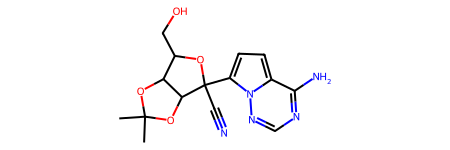

In [90]:
# Artemisin
# mol = Chem.MolFromSmiles('CC1C2C(CC3(C=CC(=O)C(=C3C2OC1=O)C)C)O')

# 4 Benzenes (Pyrene)
# mol = Chem.MolFromSmiles('c1ccc2c(c1)ccc3c4ccccc4ccc23')

# Tenofovir
# mol = Chem.MolFromSmiles('CC(CN1C=NC2=C(N=CN=C21)N)OCP(=O)(O)O')

# Paracetamol
# mol = Chem.MolFromSmiles('CC(=O)NC1=CC=C(C=C1)O')

# Paracetamol Suplhate (https://www.molinstincts.com/structure/paracetamol-sulphate-cstr-CT1102892514.html)
# mol = Chem.MolFromSmiles("CC(=O)Nc2ccc(OS(=O)(=O)Oc1ccc(NC(C)=O)cc1)cc2")

# Remdesivir
mol = Chem.MolFromSmiles('CC1(OC2C(OC(C2O1)(C#N)C3=CC=C4N3N=CN=C4N)CO)C')

mol

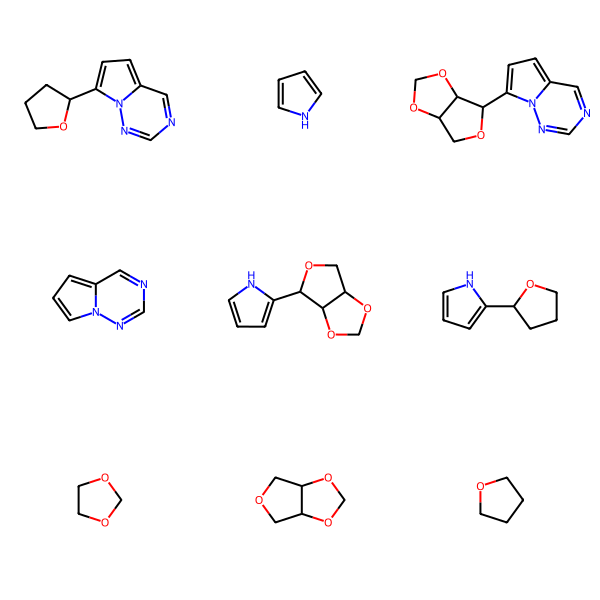

In [91]:
frags = sg.get_all_murcko_fragments(mol, break_fused_rings=True)
Draw.MolsToGridImage(frags)

In [92]:
[Chem.MolToSmiles(m) for m in frags]

['c1ncc2ccc(C3CCCO3)n2n1',
 'c1cc[nH]c1',
 'c1ncc2ccc(C3OCC4OCOC43)n2n1',
 'c1cc2cncnn2c1',
 'c1c[nH]c(C2OCC3OCOC32)c1',
 'c1c[nH]c(C2CCCO2)c1',
 'C1COCO1',
 'C1OC2COCC2O1',
 'C1CCOC1']

In [97]:
def can_frag_exists(base_mol, frag_1, frag_2):
    """
    A function that checks whether two fragments can exist without any overlapping in a base molecule.

    base_mol: The parent molecule (Mol).
    frag_1: First fragment (Mol).
    frag_2: Second fragment (Mol).
    """
    
    # Get positions of atoms of all substructures as sets of indices
    frag_1_sub_positions = [set(match) for match in base_mol.GetSubstructMatches(frag_1)]
    frag_2_sub_positions = [set(match) for match in base_mol.GetSubstructMatches(frag_2)]

    # Check for non-overlapping positions
    for position_1 in frag_1_sub_positions:
        for position_2 in frag_2_sub_positions:
            if position_1.isdisjoint(position_2):
                return True
    
    return False

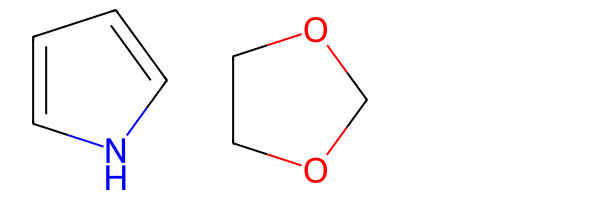

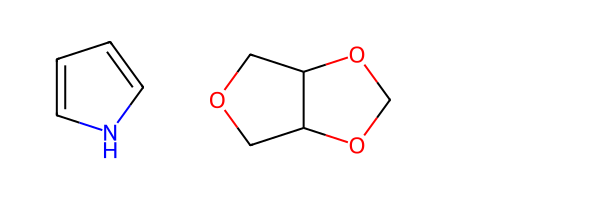

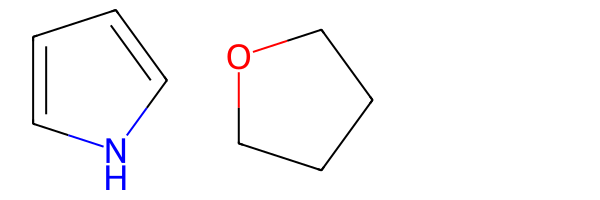

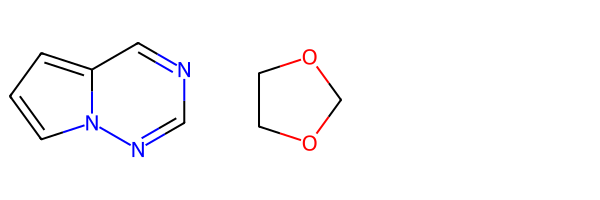

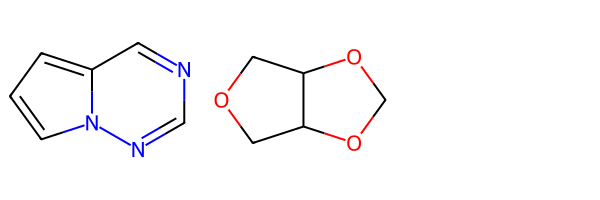

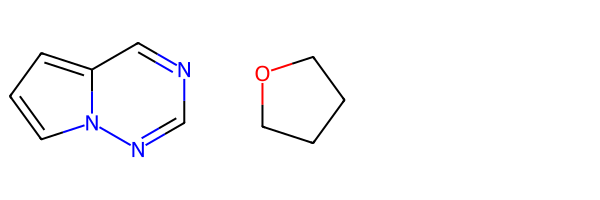

In [98]:
uq_pairs = []

total_frags = len(frags)

for idx, _ in enumerate(frags):
    for j in range(idx + 1, total_frags):
        frag_1 = frags[idx]
        frag_2 = frags[j]
        
        if can_molecules_exist_without_overlapping(mol, frag_1, frag_2):
            uq_pairs.append((frag_1, frag_2))

# uq_pairs = [i for item in uq_pairs for i in item]

for pairs in uq_pairs:
    display(Draw.MolsToGridImage(pairs))
    

In [99]:
a = (1, 2)
b = (3, 4)
c = a + b

In [100]:
c

(1, 2, 3, 4)